In [11]:
import pandas as pd

In [12]:
df = pd.read_excel('drive/MyDrive/Womens_Clothing_Reviews_Data.xlsx')

In [13]:
df.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [14]:
df.shape

(23486, 11)

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64
         Product ID  Customer Age        Rating  Recommend Flag
count  23486.000000  23486.000000  23486.000000    23486.000000
mean     918.118709     43.198544      4.196032        0.822362
std      203.298980     12.279544      1.110031        0.382216
min        0.000000     18.000000      1.000000        0.000000
25%      861.000000     34.000000      4.000000        1.000000
50%      936.000000     41.000000      5.000000        1.000000
75%     1078.000000     52.000000      5.000000        1.000000
max     1205.000000     99.000000      5.000000        1.000000


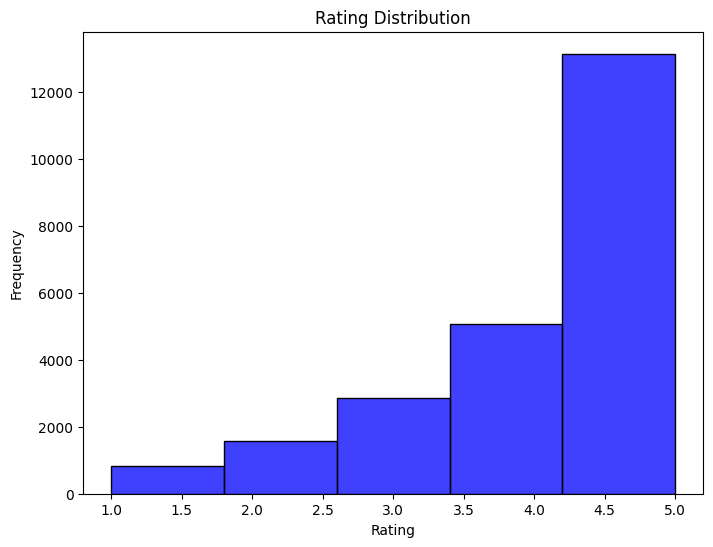

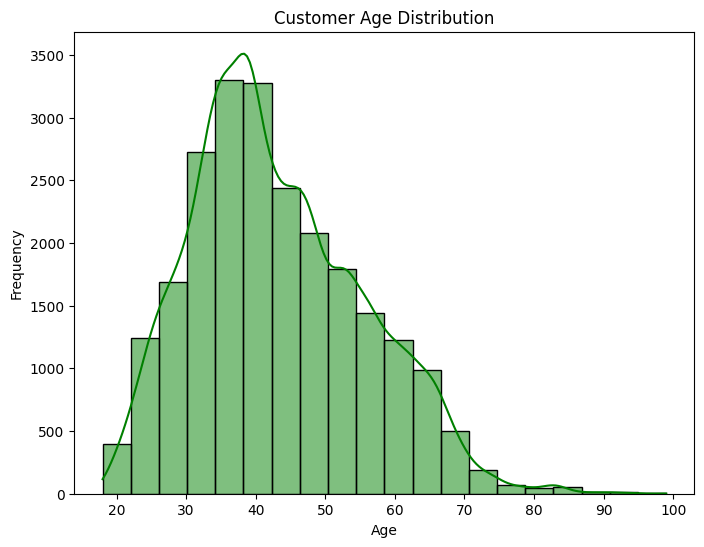

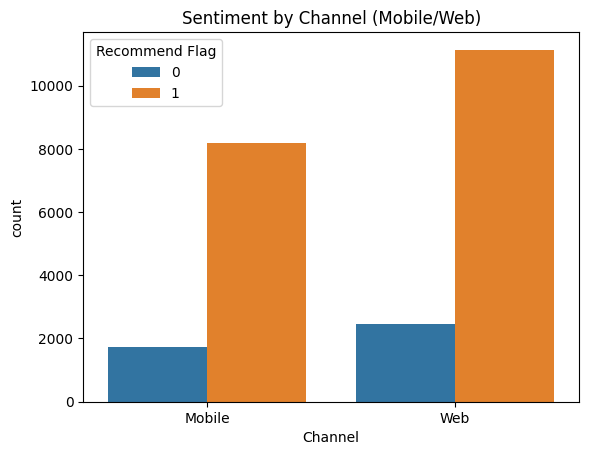

In [15]:
# Step 1: Exploratory Data Analysis (EDA)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data Cleaning - check for missing values
print(df.isnull().sum())

# Basic descriptive statistics
print(df.describe())

# Visualize Rating Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=5, kde=False, color='blue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Visualize Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Customer Age'], bins=20, kde=True, color='green')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize Sentiment by Channel
sns.countplot(x='Channel', hue='Recommend Flag', data=df)
plt.title('Sentiment by Channel (Mobile/Web)')
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


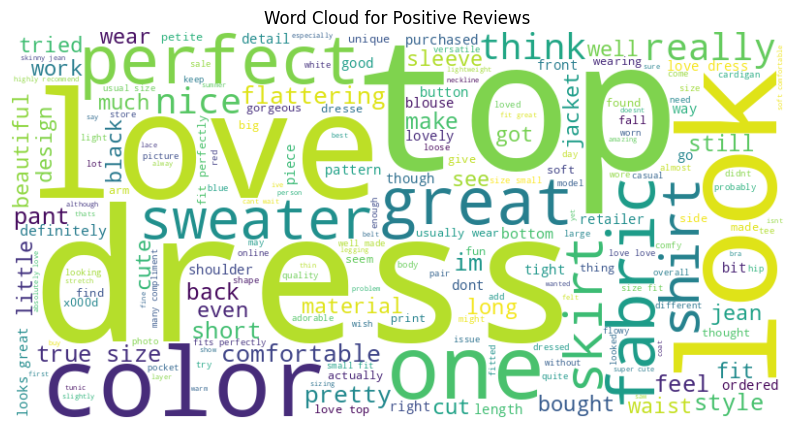

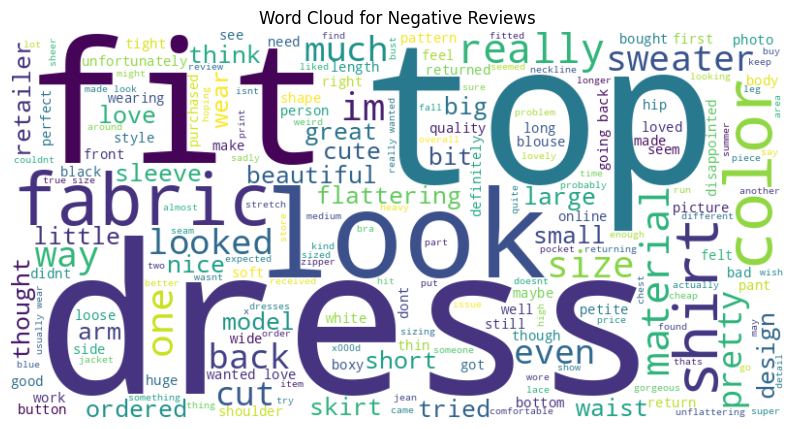

Top 10 Positive Review Words:  [('dress', 7932), ('love', 7708), ('size', 6996), ('fit', 5544), ('wear', 5400), ('great', 5373), ('top', 5365), ('like', 4819), ('im', 4716), ('color', 3586)]
Top 10 Negative Review Words:  [('dress', 2505), ('like', 2170), ('top', 1936), ('would', 1693), ('size', 1678), ('fit', 1676), ('fabric', 1508), ('im', 1257), ('love', 1201), ('back', 1199)]


In [23]:
# Step 2: Text Mining Tasks (Word Clouds & Frequency Analysis)

import nltk

# Download the missing NLTK resources
nltk.download('punkt')  # For word tokenization
nltk.download('stopwords')  # For stopword removal
nltk.download('punkt_tab')

# Now you can proceed with text processing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from wordcloud import WordCloud


# Preprocess text: Remove punctuation and stopwords
def preprocess_text(text):
    if isinstance(text, str):  # Check if the text is a string (not NaN or float)
        stop_words = set(stopwords.words('english'))
        text = text.lower()  # Convert to lowercase
        text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
        words = word_tokenize(text)  # Tokenize text
        filtered_words = [word for word in words if word not in stop_words]
        return ' '.join(filtered_words)
    else:
        return ''  # Return an empty string if the text is not a valid string

df['Cleaned_Review'] = df['Review Text'].apply(preprocess_text)

# Word Cloud for Positive Reviews (Rating > 3)
positive_reviews = df[df['Rating'] > 3]['Cleaned_Review']
positive_text = ' '.join(positive_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Word Cloud for Negative Reviews (Rating <= 3)
negative_reviews = df[df['Rating'] <= 3]['Cleaned_Review']
negative_text = ' '.join(negative_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

# Frequency Analysis (Top Words)
from collections import Counter
import re

# Function to get most common words
def get_most_common_words(text):
    words = text.split()
    return Counter(words).most_common(10)

positive_words = ' '.join(positive_reviews)
negative_words = ' '.join(negative_reviews)
positive_common_words = get_most_common_words(positive_words)
negative_common_words = get_most_common_words(negative_words)

print("Top 10 Positive Review Words: ", positive_common_words)
print("Top 10 Negative Review Words: ", negative_common_words)


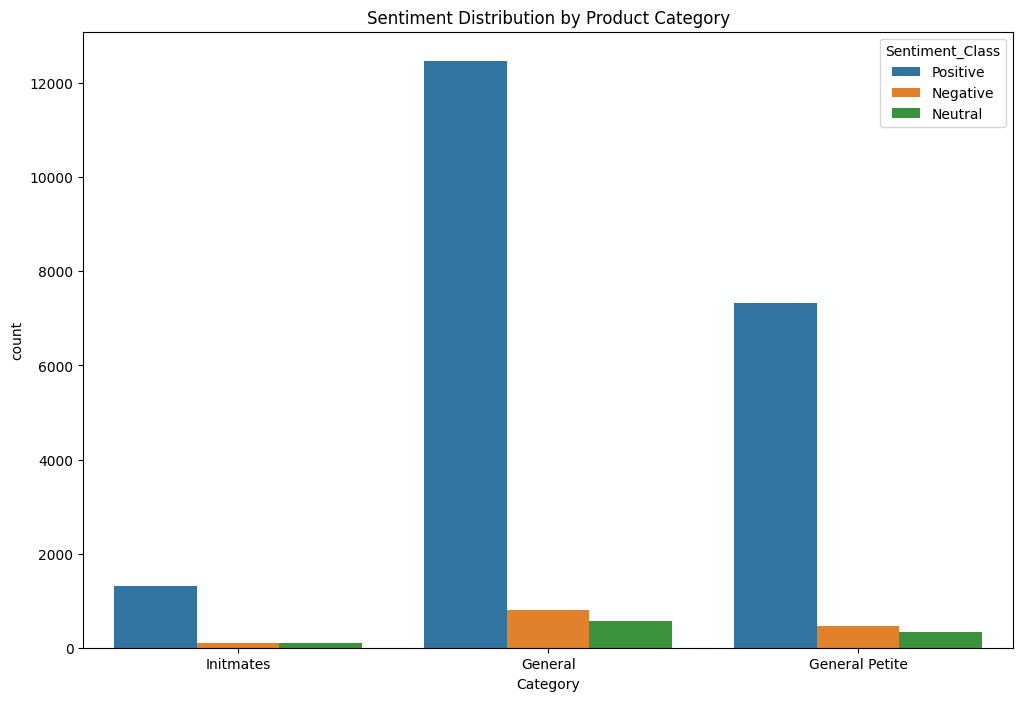

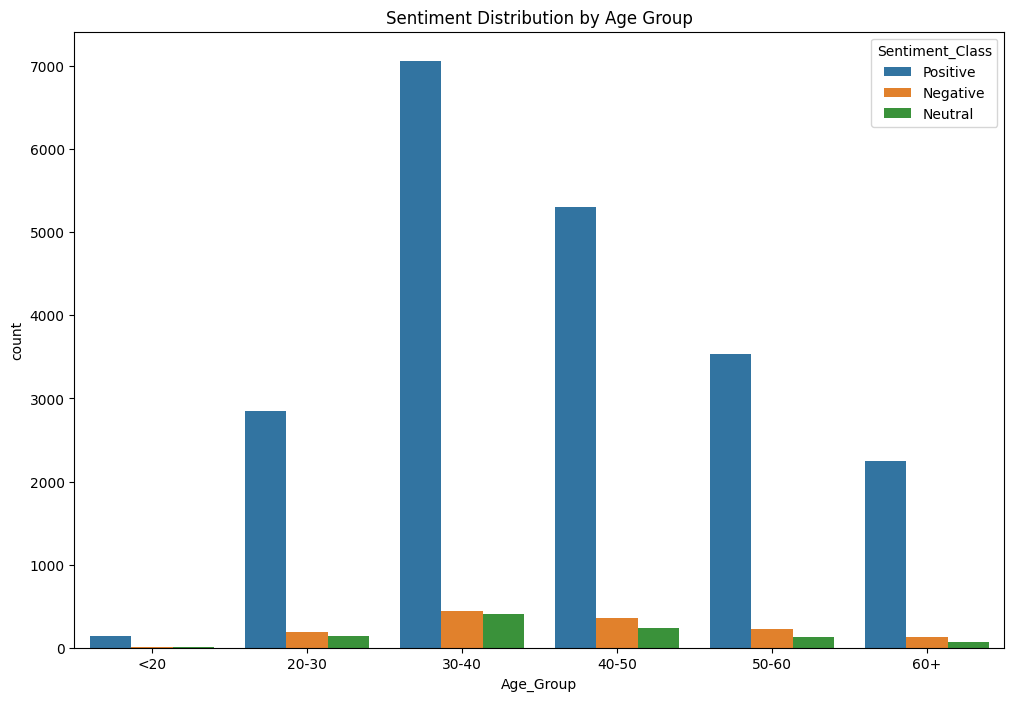

In [24]:
# Step 3: Sentiment Analysis

from textblob import TextBlob

# Sentiment analysis using TextBlob (Polarity and Subjectivity)
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # returns a value between -1 and 1

df['Sentiment'] = df['Cleaned_Review'].apply(get_sentiment)

# Classify Sentiment (positive, neutral, negative)
df['Sentiment_Class'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Sentiment Analysis by Category
plt.figure(figsize=(12, 8))
sns.countplot(x='Category', hue='Sentiment_Class', data=df)
plt.title('Sentiment Distribution by Product Category')
plt.show()

# Sentiment Analysis by Age Group
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']
df['Age_Group'] = pd.cut(df['Customer Age'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(12, 8))
sns.countplot(x='Age_Group', hue='Sentiment_Class', data=df)
plt.title('Sentiment Distribution by Age Group')
plt.show()


In [26]:
# Step 4: Predictive Analytics (Classifying Recommendations)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.sparse import hstack

# Features: Use demographic and text data
X = df[['Customer Age', 'Category', 'Location', 'Channel', 'Cleaned_Review']]
y = df['Recommend Flag']

# Text Vectorization (TF-IDF for Review Text)
vectorizer = TfidfVectorizer(max_features=500)

# Categorical Columns to One-Hot Encode
categorical_columns = ['Category', 'Location', 'Channel']

# Column transformer to encode categorical features and vectorize text
preprocessor = ColumnTransformer(
    transformers=[
        ('text', vectorizer, 'Cleaned_Review'),
        ('cat', OneHotEncoder(), categorical_columns),
        ('num', 'passthrough', ['Customer Age'])  # Keep 'Customer Age' as it is
    ])

# Model Pipeline with RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.31      0.44       851
           1       0.86      0.98      0.92      3847

    accuracy                           0.86      4698
   macro avg       0.82      0.64      0.68      4698
weighted avg       0.85      0.86      0.83      4698

[[ 261  590]
 [  79 3768]]


In [28]:
# Step 5: Topic Mining (LDA - Latent Dirichlet Allocation)

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the review text
vectorizer = CountVectorizer(stop_words='english')
X_text = vectorizer.fit_transform(df['Cleaned_Review'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_text)

# Show the top words for each topic
n_top_words = 10
words = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))


Topic #1:
size dress small im fit like ordered petite large wear
Topic #2:
dress skirt love wear beautiful like im look fabric flattering
Topic #3:
love great jeans wear fit pants color sweater perfect soft
Topic #4:
like size fabric color really love fit sleeves nice bit
Topic #5:
love great shirt wear soft perfect fits comfortable color white
